#ASSIGNMENT
#PWSKILLS
#BOOSTING TECHNIQUES
#THEORY QUESTIONS


**1. What is Boosting in Machine Learning?**

Boosting is an ensemble technique that combines multiple weak learners (often decision trees) sequentially to form a strong learner. Each model tries to correct the errors of its predecessor.


**2. How does Boosting differ from Bagging?**

* **Bagging**: Builds models in parallel and reduces variance. Example: Random Forest.
* **Boosting**: Builds models sequentially and reduces bias. Example: AdaBoost, Gradient Boosting.



**3. What is the key idea behind AdaBoost?**

AdaBoost focuses on **misclassified data points** by assigning them higher weights, so the next weak learner pays more attention to them. It combines multiple weak models into a stronger ensemble.


**4. Explain the working of AdaBoost with an example:**

1. Start with equal weights for all samples.
2. Train a weak learner (e.g., decision stump).
3. Increase weights for misclassified samples.
4. Train the next learner on the updated weights.
5. Repeat for several iterations and combine models based on accuracy.
   *Example*: Classifying spam emails using several weak learners focusing on different features (like word frequency, sender info, etc.).



**5. What is Gradient Boosting, and how is it different from AdaBoost?**

Gradient Boosting minimizes a **loss function** using gradient descent. Instead of reweighting samples, it fits each new model on the residual errors of the previous one.
*Difference*: AdaBoost uses weights; Gradient Boosting uses residuals.


**6. What is the loss function in Gradient Boosting?**

The loss function depends on the task:

* **Regression**: Mean Squared Error (MSE) or MAE
* **Classification**: Log-loss or deviance
  It guides how new trees are added to reduce prediction error.



**7. How does XGBoost improve over traditional Gradient Boosting?**

XGBoost introduces:

* **Regularization (L1 & L2)** for preventing overfitting
* **Parallel processing** for faster computation
* **Tree pruning**, **missing value handling**, and **cache optimization**
* Uses second-order derivatives for better convergence.



**8. What is the difference between XGBoost and CatBoost?**

* **XGBoost**: General-purpose, works well for structured data
* **CatBoost**: Specialized in handling **categorical variables** efficiently with built-in encoding and minimal preprocessing
* CatBoost is more user-friendly for mixed-type data.



**9. What are some real-world applications of Boosting techniques?**

* Fraud detection
* Customer churn prediction
* Credit scoring
* Search ranking
* Recommendation systems
* Medical diagnosis
* Image classification (with Gradient Boosting variants)



**10. How does regularization help in XGBoost?**

Regularization (L1 and L2 penalties):

* Prevents overfitting by penalizing complex models
* Controls model complexity and encourages sparsity
* Helps generalize better on unseen data



**11. What are some hyperparameters to tune in Gradient Boosting models?**

* **Learning rate (eta)**: Controls contribution of each tree
* **n\_estimators**: Number of boosting rounds
* **max\_depth**: Tree depth
* **min\_child\_weight**, **subsample**, **colsample\_bytree**
* **gamma**, **lambda**, **alpha**: For regularization



**12. What is the concept of Feature Importance in Boosting?**

Feature Importance measures how much each feature contributes to improving the model.

* Calculated based on **split frequency**, **gain**, or **coverage**
* Helps in feature selection and interpretation



**13. Why is CatBoost efficient for categorical data?**

CatBoost uses **ordered boosting** and **target-based encoding** to handle categorical features natively.

* Avoids overfitting and data leakage
* No need for manual encoding (like one-hot or label encoding)




##PRACTICAL QUESTIONS

In [1]:
# 1. Train an AdaBoost Classifier on a sample dataset and print model accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8566666666666667


In [2]:
# 2. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 72.02858196813793


In [1]:
# 3. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importance = pd.Series(model.feature_importances_, index=data.feature_names)
print("Feature Importance:\n", feature_importance.sort_values(ascending=False))


Feature Importance:
 mean concave points        0.434897
worst concave points       0.273841
worst perimeter            0.050974
worst area                 0.047995
worst texture              0.047193
worst radius               0.045435
worst concavity            0.022999
mean texture               0.018393
concavity error            0.015558
radius error               0.010003
area error                 0.005478
worst smoothness           0.004507
compactness error          0.004384
concave points error       0.003404
perimeter error            0.002045
symmetry error             0.001845
mean compactness           0.001712
texture error              0.001303
worst symmetry             0.001284
mean concavity             0.001199
worst fractal dimension    0.001087
worst compactness          0.001012
mean smoothness            0.000926
mean fractal dimension     0.000678
fractal dimension error    0.000596
smoothness error           0.000380
mean perimeter             0.000357
mean ar

In [2]:
# 4. Train a Gradient Boosting Regressor and evaluate using R-Squared Score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=1000, n_features=20, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))


R-squared: 0.9137480144152695


In [3]:
# 5. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

gb_acc = accuracy_score(y_test, gb_model.predict(X_test))
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))

print("Gradient Boosting Accuracy:", gb_acc)
print("XGBoost Accuracy:", xgb_acc)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:22:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.9590643274853801
XGBoost Accuracy: 0.9707602339181286


In [18]:
# 6. Train a CatBoost Classifier and evaluate using F1-Score
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("F1 Score:", f1_score(y_test, y_pred))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00
F1 Score: 0.8721311475409836


In [5]:
# 7. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 5920.421700530827


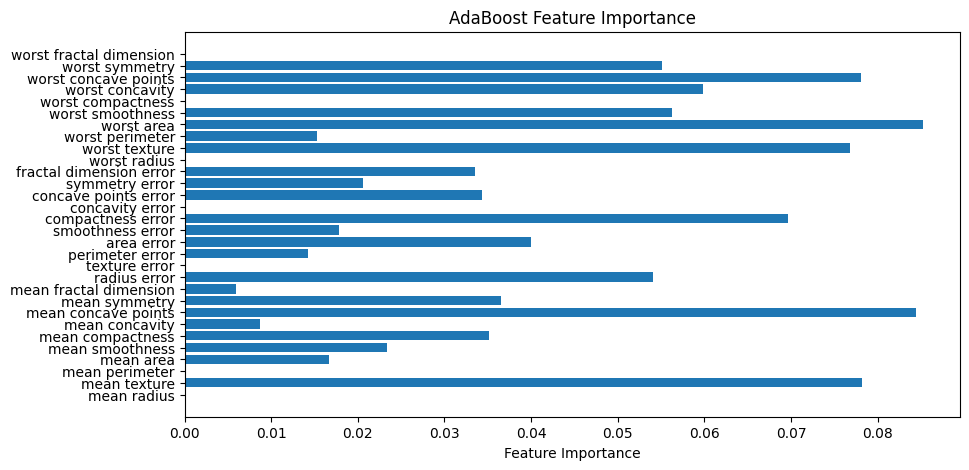

In [6]:
# 8. Train an AdaBoost Classifier and visualize feature importance
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.barh(data.feature_names, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("AdaBoost Feature Importance")
plt.show()


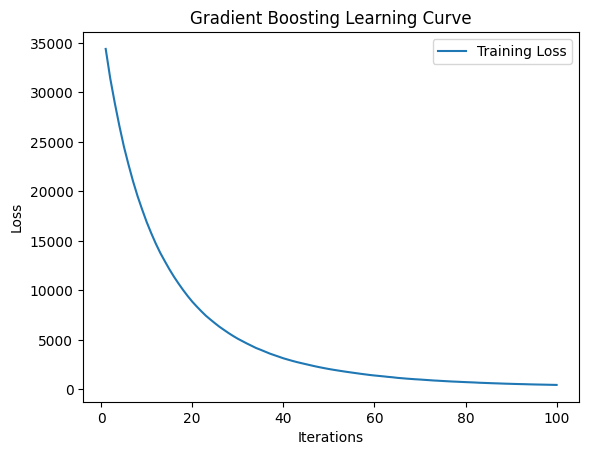

In [7]:
# 9. Train a Gradient Boosting Regressor and plot learning curves
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=20, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

train_score = model.train_score_

plt.plot(range(1, len(train_score)+1), train_score, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Boosting Learning Curve")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:22:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


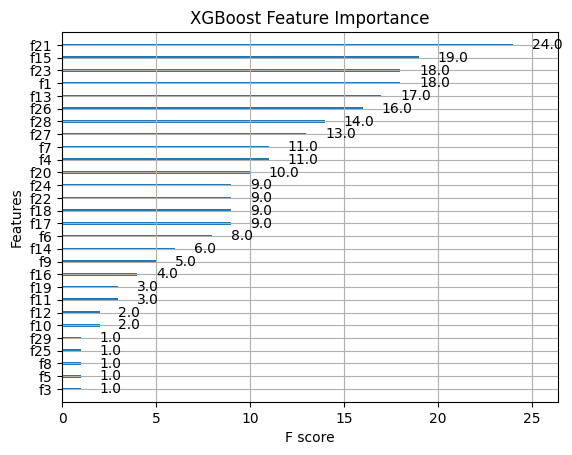

In [8]:
# 10. Train an XGBoost Classifier and visualize feature importance
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()


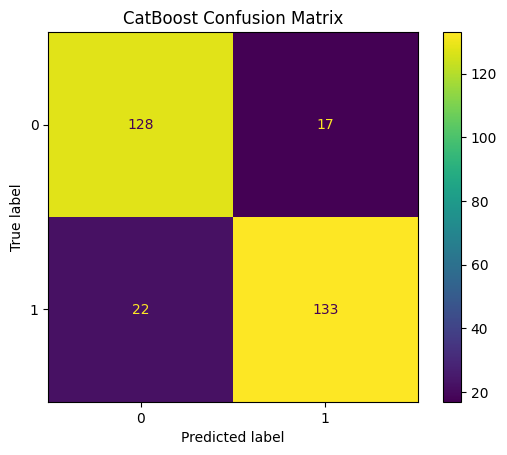

In [19]:
# 11. Train a CatBoost Classifier and plot the confusion matrix
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("CatBoost Confusion Matrix")
plt.show()


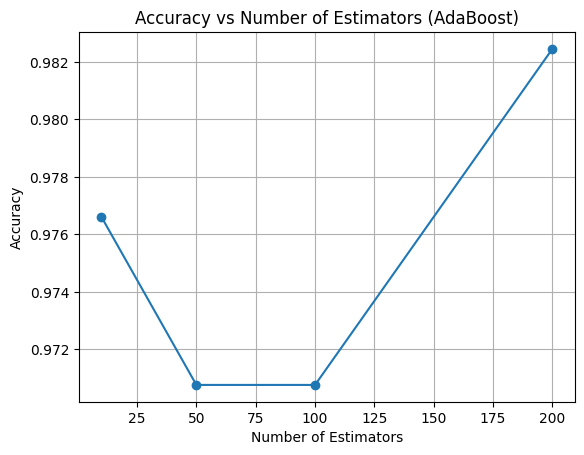

In [10]:
# 12. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy
import matplotlib.pyplot as plt

estimators = [10, 50, 100, 200]
accuracies = []

for n in estimators:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(acc)

plt.plot(estimators, accuracies, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Estimators (AdaBoost)")
plt.grid(True)
plt.show()



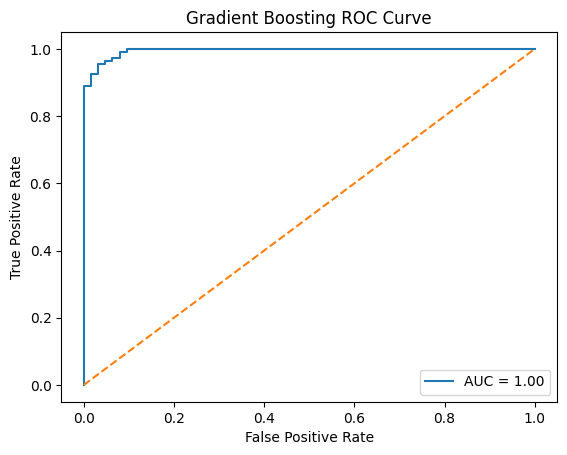

In [11]:
# 13. Train a Gradient Boosting Classifier and visualize the ROC curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve")
plt.legend()
plt.show()


In [12]:
# 14. Train an XGBoost Regressor and tune the learning rate using GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
model = XGBRegressor(n_estimators=100, random_state=42)
grid = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=3)
grid.fit(X_train, y_train)

print("Best Learning Rate:", grid.best_params_['learning_rate'])
print("Best Score (MSE):", -grid.best_score_)


Best Learning Rate: 0.1
Best Score (MSE): 0.060072775930166245


In [20]:
# 15. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
import numpy as np

X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

model = CatBoostClassifier(class_weights=[1, 10], verbose=0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       269
           1       0.74      0.81      0.77        31

    accuracy                           0.95       300
   macro avg       0.86      0.89      0.87       300
weighted avg       0.95      0.95      0.95       300



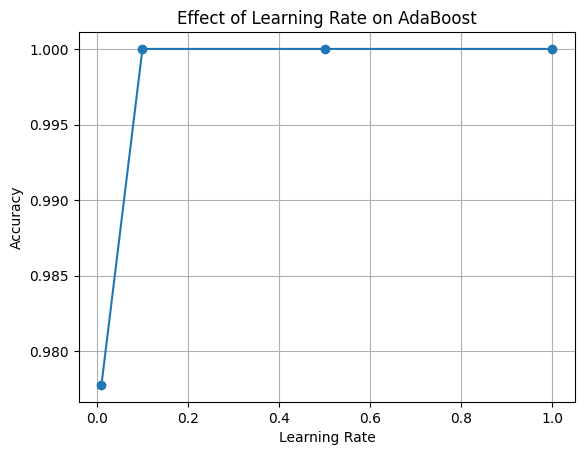

In [15]:
# 16. Train an AdaBoost Classifier and analyze the effect of different learning rates
learning_rates = [0.01, 0.1, 0.5, 1]
accuracies = []

for rate in learning_rates:
    model = AdaBoostClassifier(learning_rate=rate, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(acc)

plt.plot(learning_rates, accuracies, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Effect of Learning Rate on AdaBoost")
plt.grid(True)
plt.show()


In [16]:
# 17. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss
from xgboost import XGBClassifier

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, y_prob))


Log Loss: 0.009982810029811636


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:23:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
